In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import corner
import copy
import pickle
from astropy.io import ascii

%matplotlib inline

## Definitions of fields can be found at:

## confirmed planets:
#### https://exoplanetarchive.ipac.caltech.edu/docs/API_exoplanet_columns.html

## KOIs:
#### https://exoplanetarchive.ipac.caltech.edu/docs/API_kepcandidate_columns.html

In [5]:
KOIs = ascii.read("../../../../KOIs_chen2018_goodSystems.csv")
print(KOIs)
print(len(KOIs.colnames))

 kepid   kepoi_name  kepler_name  ...   koi_pmass_err1     koi_pmass_err2  
-------- ---------- ------------- ... ------------------ ------------------
 1026957  K00958.01            -- ...  5.769464972554899  3.244408578305821
 1161345  K00984.01            -- ...  6.326092545818279 3.5574232654922424
 1429589  K04923.01            -- ... 1.5735103860765358 0.7378008287493754
 1431122  K00994.01            -- ...  2.419108737036141 1.0891220900035181
 1432789  K00992.01  Kepler-745 b ...  5.964185807741979  3.027858259246558
 1432789  K00992.02            -- ...  2.437079035986733 1.0697247065679856
 1717722  K03145.01            -- ... 2.6787928971009194 1.3399128949332408
 1717722  K03145.02            -- ... 1.3217080679402717 0.6511151044108447
 1718189  K00993.03            -- ... 3.0588005877402042 1.4588377614817154
 1718189  K00993.02  Kepler-262 b ... 2.9891737858212397  1.378072373671277
     ...        ...           ... ...                ...                ...
12645057  K0

In [6]:
print(len(np.array(KOIs['kepid'])))
print(len(np.unique(np.array(KOIs['kepid']))))

3512
2656


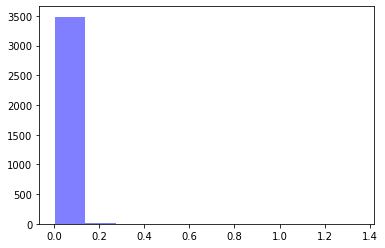

0.003623
1.35192


In [12]:
plt.hist(KOIs['koi_ror'],color='b',alpha=0.5)
plt.show()

print(np.min(KOIs['koi_ror']))
print(np.max(KOIs['koi_ror']))

## Want these in a format:
### each row = 1 planetary system, i.e. a list of "planets"
### each "planet" = an array of [Rp/Rstar, P, Teff, logg, Fe/H]


In [ ]:
systems = []

idxs = np.arange(len(KOIs['kepid']))
kepids = np.array(KOIs['kepid'])
unique_kepid = np.unique(np.array(KOIs['kepid']))
print(len(unique_kepid))

for ID in unique_kepid:
    goodSystem = True
    system = []
    thisSystem_mask = (kepids == ID)
    thisSystem_idxs = idxs[thisSystem_mask]
    
    #singles only
    #if len(thisSystem_idxs) > 1:
    #all systems
    if True:
        kepNames = KOIs['kepoi_name'][thisSystem_idxs]
        Ps = KOIs['koi_period'][thisSystem_idxs]
        #sort KOIs from inner to outer
        sort = np.argsort(Ps)
        thisSystem_idxs = thisSystem_idxs[sort]

        count = KOIs['koi_count'][thisSystem_idxs[0]]

        Teff = KOIs['koi_steff'][thisSystem_idxs[0]]
        logg = KOIs['koi_slogg'][thisSystem_idxs[0]]
        met = KOIs['koi_smet'][thisSystem_idxs[0]]

        if np.any(np.isnan(np.array((Teff,logg,met)))):
            print(np.array((Teff,logg,met)))
            print("star nan!")
            print(ID)
            pass

        else:
            for j in range(1,count+1):
                planet = []
                planet.append(KOIs['koi_ror'][thisSystem_idxs[j-1]])
                planet.append(KOIs['koi_period'][thisSystem_idxs[j-1]])
                planet.append(Teff)
                planet.append(logg)
                planet.append(met)
                if np.any(np.isnan(np.array((planet)))):
                    print(planet)
                    print("planet nan!")
                    print(ID)
                    goodSystem = False
                    pass
                else:
                    system.append((planet))

            if goodSystem is True:
                systems.append(system)

print(len(systems))

print(type(systems))
print(type(systems[0]))
print(type(systems[0][0]))

In [9]:
def featureScale(trainingSet,n_features):
    """
    Scale each feature to have mean=0, stdev = 1
    """
    
    stacked = np.zeros((1,n_features))
    
    for i in range(0,len(trainingSet)):
        sys = trainingSet[i]
        for j in range(0,len(sys)):
            planet = np.array((sys[j]))
            stacked = np.vstack((stacked,planet))
            
    mu = np.mean(stacked,axis=0)
    sigma = np.std(stacked,axis=0)
    
    print(mu)
    print(sigma)
    scaledTrainingSet = []
    for i in range(0,len(trainingSet)):
        sys = trainingSet[i]
        newsys = []
        for j in range(0,len(sys)):
            planet = np.array(sys[j])
            planet = (planet - mu)/sigma
            newsys.append(list(planet))
            
        scaledTrainingSet.append(newsys)
    
    return scaledTrainingSet
            

In [10]:
systems = featureScale(systems,5)

with open("realKOIs_allFeatures.txt", "wb") as picklefile:
    pickle.dump(systems, picklefile)

[ 2.36944640e-02  5.20123140e+01  5.53055480e+03  4.39551836e+00
 -3.68687731e-02]
[3.72488920e-02 1.05152566e+02 6.67102955e+02 2.60856163e-01
 2.38340857e-01]


In [11]:
with open("realKOIs_allFeatures.txt", "rb") as picklefile:
    systest = pickle.load(picklefile)

print(len(systest))
print(type(systest))
print(type(systest[0]))
print(type(systest[0][0]))
print(systest[0:2])
print(systems[0:2])


2656
<class 'list'>
<class 'list'>
<class 'list'>
[[[0.22740370411446126, -0.287686900151407, -1.0066733945569173, 0.8298889214948308, 0.1546892700267652]], [[0.05429788382714835, -0.45386288636332406, -0.3516020947410149, 0.6918818312599723, 0.6581698805307977]]]
[[[0.22740370411446126, -0.287686900151407, -1.0066733945569173, 0.8298889214948308, 0.1546892700267652]], [[0.05429788382714835, -0.45386288636332406, -0.3516020947410149, 0.6918818312599723, 0.6581698805307977]]]


In [ ]:
plt.hist()